In [7]:
import numpy as np
from orphics import io,cosmology,maps

[  434.74051464  1954.15287774  3405.96081607  5319.1270427
 13892.49277198]


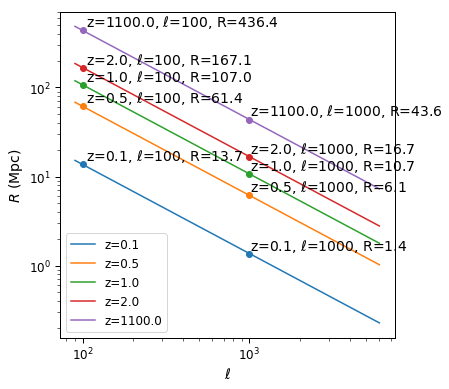

In [44]:
ells = np.logspace(np.log10(90),np.log10(6000),200)
thetas = np.pi/ells
thetas_deg = np.rad2deg(thetas)

cc = cosmology.Cosmology(skipCls=True,skipPower=True,skip_growth=True)
zs = [0.1,0.5,1.0,2.0,1100.]
tells = np.array([100,1000])
tthetas = np.pi/tells
chis = cc.results.comoving_radial_distance(zs)
print(chis)
pl = io.Plotter(xscale='log',yscale='log',ylabel='$R$ (Mpc)',xlabel='$\\ell$',figsize=(6,6))
for z,chi in zip(zs,chis):
    Rs = chi*thetas
    ks = 1./Rs
    for tell,R in zip(tells,chi*tthetas):
        pl._ax.annotate("z=%0.1f, $\\ell$=%d, R=%0.1f" %  (z,tell,R), (tell+5,R*1.1),size=14)
    pl._ax.scatter(tells,chi*tthetas)
    pl.add(ells,Rs,label="z="+str(z))
pl.legend(loc='lower left')
pl.done()

10.8
10.8


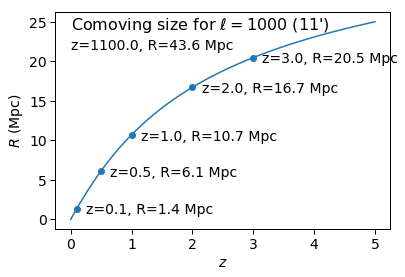

In [97]:
zs = np.linspace(0,5,1000)

def ell_to_R(zs,ell=1000):
    chis = cc.results.comoving_radial_distance(zs)
    theta = np.pi/ell
    print(np.rad2deg(theta)*60.)
    Rs = chis*theta
    return Rs

Rs = ell_to_R(zs)
z0s = np.array([0.1,0.5,1.0,2.0,3.0,1100.])
R0s = ell_to_R(z0s)

pl = io.Plotter(xlabel='$z$',ylabel='$R$ (Mpc)',labsize=14,ftsize=14)
pl._ax.scatter(z0s[:-1],R0s[:-1])
for z0,R0 in zip(z0s[:-1],R0s[:-1]):
        pl._ax.annotate("z=%0.1f, R=%0.1f Mpc" %  (z0,R0), (z0+0.15,R0-0.7),size=14)
pl._ax.annotate("z=%0.1f, R=%0.1f Mpc" %  (z0s[-1],R0s[-1]), (0,21.5),size=14)
pl._ax.annotate("Comoving size for $\\ell=1000$ (11')", (0,24),size=16)
    
pl.add(zs,Rs)
pl.done()


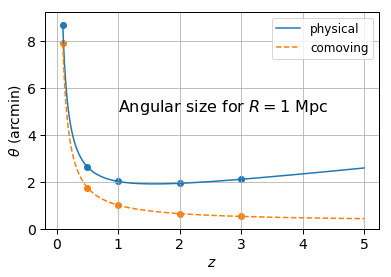

In [112]:
zs = np.linspace(0.1,5,1000)

def R_p_to_theta(zs,Rp=1,comoving=False):
    chis = cc.results.angular_diameter_distance(zs) if not(comoving) else cc.results.comoving_radial_distance(zs)
    thetas = Rp/chis
    return np.rad2deg(thetas)*60.0

pl = io.Plotter(xlabel='$z$',ylabel='$\\theta$ (arcmin)',labsize=14,ftsize=14)
pl._ax.annotate("Angular size for $R = 1$ Mpc", (1,5),size=16)
pl.add(zs,R_p_to_theta(zs),label='physical')
pl.add(zs,R_p_to_theta(zs,comoving=True),ls="--",label='comoving')
R0s = R_p_to_theta(z0s)
R1s = R_p_to_theta(z0s,comoving=True)
pl._ax.scatter(z0s[:-1],R0s[:-1])
pl._ax.scatter(z0s[:-1],R1s[:-1])

pl._ax.grid()
pl.legend(loc='upper right')
pl.done()
